<a href="https://colab.research.google.com/github/Sokaraa/TEST/blob/main/vegtables%26friuts%20classification%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zhra360","key":"6dff6f1fe2778d8d71b43fcccff4cb2d"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten
!unzip fruit-and-vegetable-disease-healthy-vs-rotten.zip -d dataset


Streaming output truncated to the last 5000 lines.
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (85).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (86).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (87).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (88).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (89).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (9).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (90).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (91).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (92).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/fre

In [4]:
import os  # discover the folder structure

base_dir = "dataset/Fruit And Vegetable Diseases Dataset"

for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        num_images = len([f for f in os.listdir(folder_path) if f.endswith('.jpg')])
        print(f"{folder:<30} يحتوي على {num_images} صورة")


Jujube__Healthy                يحتوي على 200 صورة
Bellpepper__Healthy            يحتوي على 603 صورة
Strawberry__Healthy            يحتوي على 1603 صورة
Cucumber__Rotten               يحتوي على 563 صورة
Bellpepper__Rotten             يحتوي على 591 صورة
Banana__Healthy                يحتوي على 796 صورة
Grape__Rotten                  يحتوي على 200 صورة
Mango__Healthy                 يحتوي على 1597 صورة
Cucumber__Healthy              يحتوي على 588 صورة
Strawberry__Rotten             يحتوي على 1570 صورة
Tomato__Rotten                 يحتوي على 582 صورة
Grape__Healthy                 يحتوي على 200 صورة
Guava__Rotten                  يحتوي على 200 صورة
Pomegranate__Healthy           يحتوي على 200 صورة
Orange__Rotten                 يحتوي على 591 صورة
Orange__Healthy                يحتوي على 306 صورة
Apple__Rotten                  يحتوي على 579 صورة
Potato__Rotten                 يحتوي على 583 صورة
Apple__Healthy                 يحتوي على 319 صورة
Potato__Healthy                يحتوي على 603 صو

In [5]:
#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% تدريب، 20% اختبار
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 23431 images belonging to 28 classes.
Found 5846 images belonging to 28 classes.


In [6]:
# show classes names
class_names = train_data.class_indices
class_names = {v: k for k, v in class_names.items()}
print("الكلاسات الموجودة في الداتا:\n")
for i in class_names:
    print(f"{i}: {class_names[i]}")


الكلاسات الموجودة في الداتا:

0: Apple__Healthy
1: Apple__Rotten
2: Banana__Healthy
3: Banana__Rotten
4: Bellpepper__Healthy
5: Bellpepper__Rotten
6: Carrot__Healthy
7: Carrot__Rotten
8: Cucumber__Healthy
9: Cucumber__Rotten
10: Grape__Healthy
11: Grape__Rotten
12: Guava__Healthy
13: Guava__Rotten
14: Jujube__Healthy
15: Jujube__Rotten
16: Mango__Healthy
17: Mango__Rotten
18: Orange__Healthy
19: Orange__Rotten
20: Pomegranate__Healthy
21: Pomegranate__Rotten
22: Potato__Healthy
23: Potato__Rotten
24: Strawberry__Healthy
25: Strawberry__Rotten
26: Tomato__Healthy
27: Tomato__Rotten


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Convolution 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),

    # Convolution 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Convolution 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten + Fully connected layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(train_data.num_classes, activation='softmax')  # classes number in dataset
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
epochs = 10

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 21/733 ━━━━━━━━━━━━━━━━━━━━ 3:37 305ms/step - accuracy: 0.1075 - loss: 3.2585

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


733/733 ━━━━━━━━━━━━━━━━━━━━ 326s 436ms/step - accuracy: 0.2907 - loss: 2.3933 - val_accuracy: 0.6420 - val_loss: 1.1801
Epoch 2/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 290s 396ms/step - accuracy: 0.6085 - loss: 1.2908 - val_accuracy: 0.7398 - val_loss: 0.8792
Epoch 3/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 314s 384ms/step - accuracy: 0.6816 - loss: 1.0173 - val_accuracy: 0.7663 - val_loss: 0.7923
Epoch 4/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 282s 384ms/step - accuracy: 0.7309 - loss: 0.8718 - val_accuracy: 0.7537 - val_loss: 0.8388
Epoch 5/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 323s 386ms/step - accuracy: 0.7526 - loss: 0.7844 - val_accuracy: 0.7663 - val_loss: 0.7740
Epoch 6/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 283s 386ms/step - accuracy: 0.7754 - loss: 0.7250 - val_accuracy: 0.7966 - val_loss: 0.6787
Epoch 7/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 282s 385ms/step - accuracy: 0.7915 - loss: 0.6601 - val_accuracy: 0.8070 - val_loss: 0.6873
Epoch 8/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 281s 383ms/step - accuracy: 0.8117 - loss: 0.59

In [10]:
# accuracy on the validation data
val_loss, val_accuracy = model.evaluate(val_data)
print(f"\n Validation Accuracy: {val_accuracy * 100:.2f}%")


183/183 ━━━━━━━━━━━━━━━━━━━━ 64s 350ms/step - accuracy: 0.8485 - loss: 0.5801

 Validation Accuracy: 84.90%


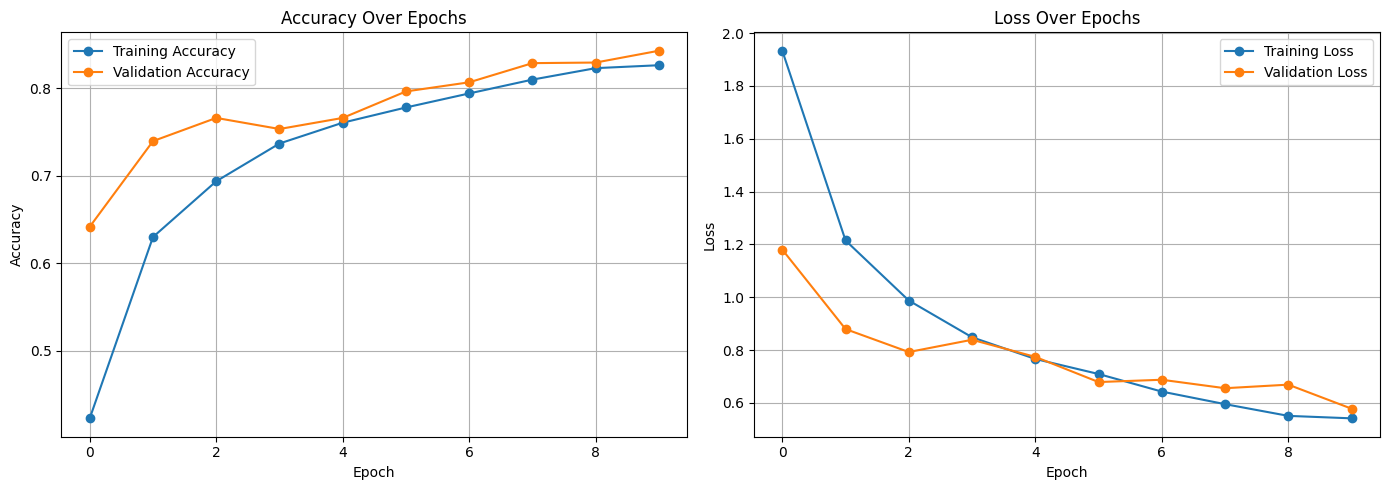

In [11]:
import matplotlib.pyplot as plt

#  Accuracy and loss during Epochs
plt.figure(figsize=(14, 5))

# Accuracy figure
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss figure
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


 69/183 ━━━━━━━━━━━━━━━━━━━━ 36s 316ms/step

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


183/183 ━━━━━━━━━━━━━━━━━━━━ 63s 339ms/step


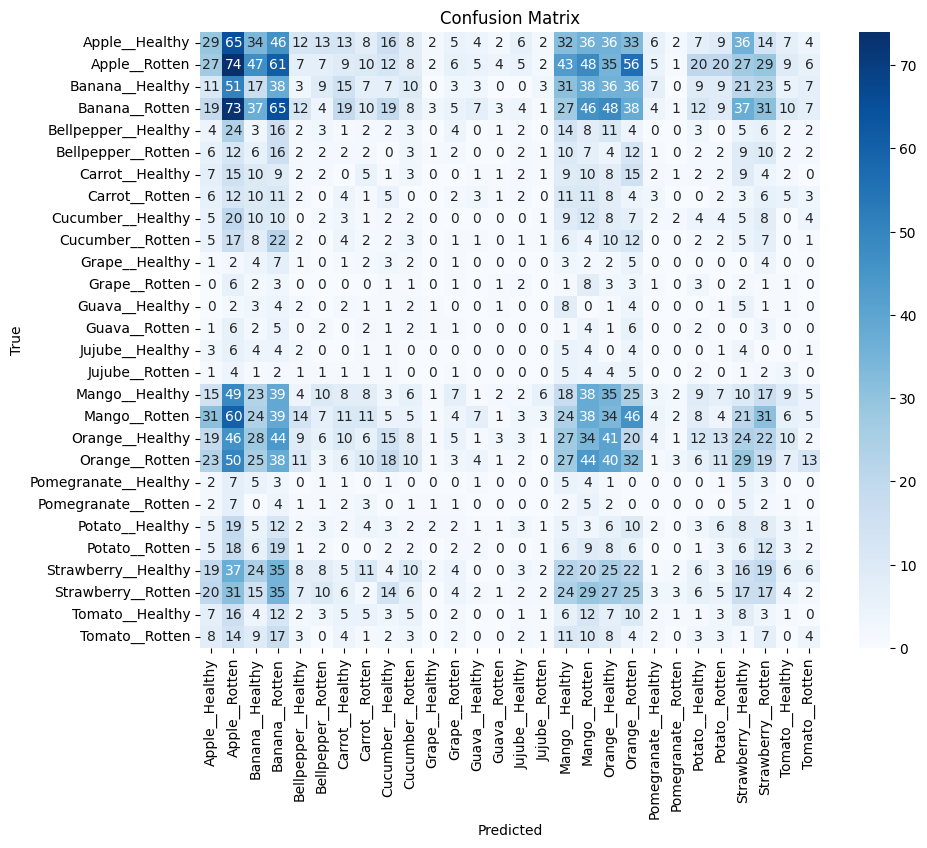


📋 Classification Report:
                      precision    recall  f1-score   support

      Apple__Healthy       0.10      0.06      0.08       487
       Apple__Rotten       0.10      0.13      0.11       585
     Banana__Healthy       0.05      0.04      0.04       399
      Banana__Rotten       0.11      0.12      0.11       559
 Bellpepper__Healthy       0.02      0.02      0.02       122
  Bellpepper__Rotten       0.02      0.02      0.02       118
     Carrot__Healthy       0.00      0.00      0.00       123
      Carrot__Rotten       0.01      0.01      0.01       115
   Cucumber__Healthy       0.01      0.02      0.02       121
    Cucumber__Rotten       0.03      0.03      0.03       118
      Grape__Healthy       0.00      0.00      0.00        40
       Grape__Rotten       0.01      0.03      0.02        40
      Guava__Healthy       0.00      0.00      0.00        40
       Guava__Rotten       0.00      0.00      0.00        40
     Jujube__Healthy       0.00      0.00  

In [12]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# prediction
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# true values
y_true = val_data.classes

# classes names
class_labels = list(val_data.class_indices.keys())

# confusion matrix calc
cm = confusion_matrix(y_true, y_pred_classes)

# Confusion Matrix drwaing
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# classification report
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


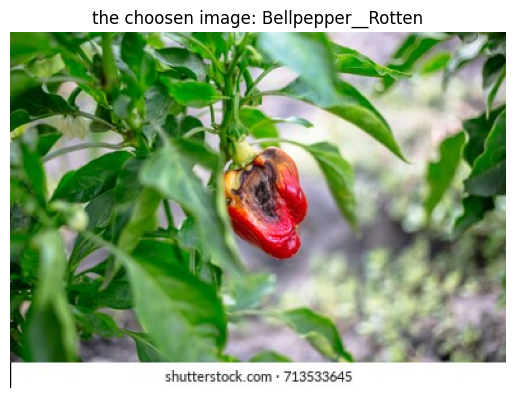

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
the result is: Bellpepper__Rotten
Rotten  conidence percentage : 98.73%


In [13]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import os

# choose random class
random_class = random.choice(os.listdir(base_dir))
class_folder = os.path.join(base_dir, random_class)

# choose random image
random_image_name = random.choice(os.listdir(class_folder))
random_image_path = os.path.join(class_folder, random_image_name)

# show image
img = Image.open(random_image_path).convert("RGB")
img_resized = img.resize((img_size, img_size))

plt.imshow(img)
plt.title(f"the choosen image: {random_class}")
plt.axis('off')
plt.show()

# prepare image for the model
img_array = np.array(img_resized) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]
confidence = np.max(prediction)

# predictable class name
predicted_label = class_names[predicted_class]

# is it
status = "Rotten" if "Rotten" in predicted_label else "Healthy"

print(f"the result is: {predicted_label}")
print(f"{status}  conidence percentage : {confidence * 100:.2f}%")


In [32]:
from google.colab import files
from PIL import Image

uploaded = files.upload()

# upload an image
for filename in uploaded.keys():
    img_path = filename
    print(f"the image '{img_path}' uploaded successfuly ")
    break


Saving download (4).jpeg to download (4) (1).jpeg
the image 'download (4) (1).jpeg' uploaded successfuly 


In [33]:
import numpy as np

# open the image and handel it's size
img = Image.open(img_path).convert("RGB")
img_resized = img.resize((img_size, img_size))

# turning it into an array
img_array = np.array(img_resized) / 255.0
img_array = np.expand_dims(img_array, axis=0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


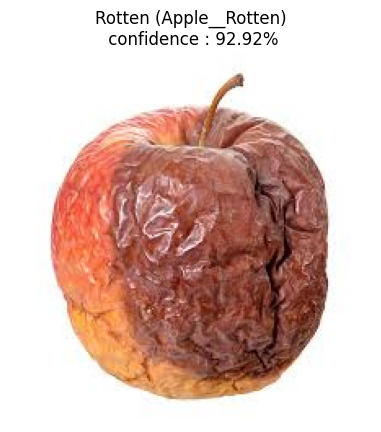

In [35]:
# model prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]
confidence = np.max(prediction)

# predicted class label
predicted_label = class_names[predicted_class]

# Health or bad
status = "Rotten" if "Rotten" in predicted_label else "Healthy"

# show image
import matplotlib.pyplot as plt

plt.imshow(Image.open(img_path))
plt.axis('off')
plt.title(f"{status} ({predicted_label})\n confidence : {confidence * 100:.2f}%")
plt.show()
